# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Châu Tấn Kiệt
- MSSV: 21127329
- Lớp: 21CLC4

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
label_train, label_test = train.columns, test.columns
x_train = train.iloc[:, :-1].to_numpy()   # Dataframe (chứa 10 đặc trưng huấn luyện)
y_train = train.iloc[:, -1].to_numpy()    # Series    (chứa 1 giá trị mục tiêu kiểm tra)

x_test = test.iloc[:, :-1].to_numpy()     # Dataframe (chứa 10 đặc trưng kiểm tra)
y_test = test.iloc[:, -1].to_numpy()      # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
def MAE(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def findFormula(a, b):
    print('Intercept: \n', b)
    print('Coefficients: \n', a)

def LinearRegression(a, b):
    reg = linear_model.LinearRegression().fit(a, b)
    return reg.coef_, reg.intercept_

def CrossValidation(a, b, kfold):
    kf = KFold(n_splits=kfold, shuffle = True)
    error_list = []

    for train_index, test_index in kf.split(a):
        A_train, A_test = a[train_index], a[test_index]
        b_train, b_test = b[train_index], b[test_index]
        x, bias = LinearRegression(A_train, b_train)
        error_list.append(MAE(b_test,(np.dot(A_test, x) + bias)))

    return np.mean(error_list)

def chooseBestProperty(a, b):
    result = []

    for i in range(a.shape[1]):
        cv_prop = CrossValidation(a[:, i:i + 1], b, 10)
        result.append(cv_prop)
    
    return result, np.argmin(result)

## Xử lý outlier bằng thuật toán IQR 
def replace_outliers_with_iqr(data_frame, column_name):
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = data_frame[column_name].median()
    data_frame[column_name] = np.where((data_frame[column_name] < lower_bound) | (data_frame[column_name] > upper_bound), median_value, data_frame[column_name])


# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [5]:
## Phần code cho yêu cầu 1a
first11 = train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]

In [6]:
x_a, bias_a = LinearRegression(first11.to_numpy()[:,:], y_train)

In [7]:
first11_test = test[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
first11_pred = bias_a + np.sum(x_a * first11_test, axis = 1)

In [8]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
MAE(y_test, first11_pred)

1.5956486884762975

In [9]:
# Tìm công thức
findFormula(x_a,bias_a)

Intercept: 
 -33.969283681778
Coefficients: 
 [2.85202007 1.01786957 0.60428174 0.47356583 0.19237624]


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 49248.090 - 23183.330{Gender} + 702.767{10percentage} +  1259.018{12percentage} - 99570.608{CollegeTier} 
+ 18369.962{Degree}\\ + 1297.532{collegeGPA} - 8836.727{CollegeCityTier} + 141.760{English} + 145.742{Logical} +114.643{Quant} + 34955.750{Domain}$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [10]:
# Phần code cho yêu cầu 1b
# In ra các kết quả cross-validation như yêu cầu
personality = train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
error_list_b, best_index_b = chooseBestProperty(personality.to_numpy(), y_train)
cv_list_b = dict(zip(personality.columns, error_list_b))
for c in cv_list_b: 
    print (f'Cross-validation error for {c}: {cv_list_b[c]}')

Cross-validation error for Hours Studied: 15.448298289745912
Cross-validation error for Previous Scores: 6.618422681591835
Cross-validation error for Extracurricular Activities: 16.19618280233976
Cross-validation error for Sleep Hours: 16.186672699117537
Cross-validation error for Sample Question Papers Practiced: 16.18330778235296


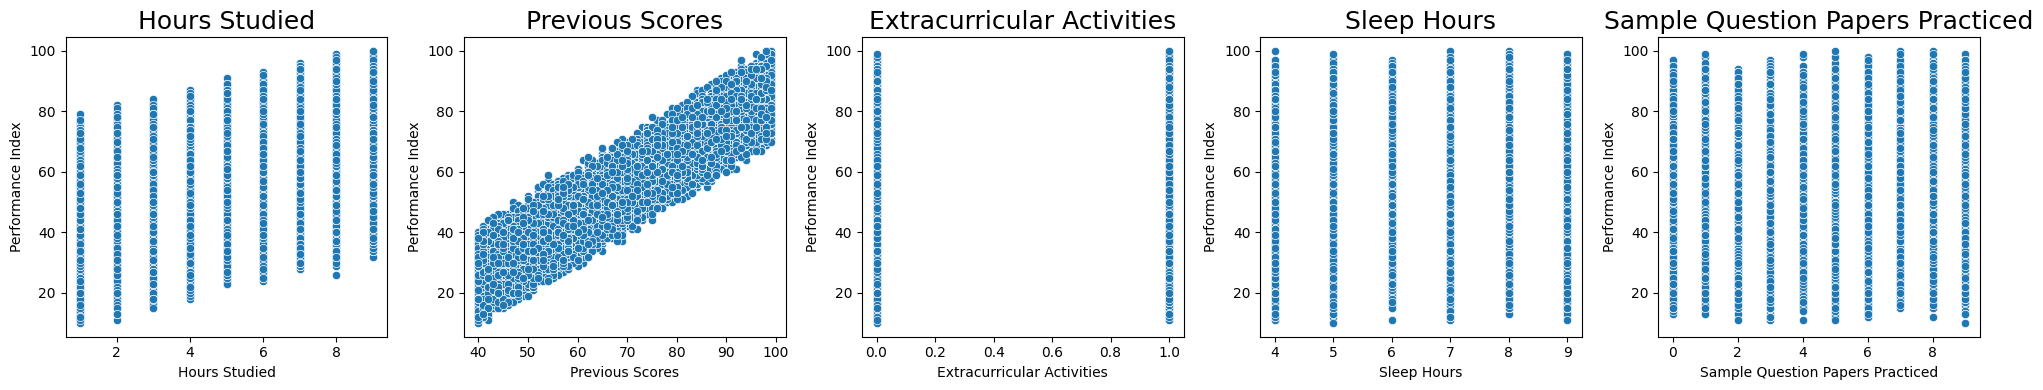

In [11]:
plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=0.3)

for i, s in enumerate(personality):
    plt.subplot2grid((1, 5), (0,i))
    sns.scatterplot(x=train[s], y=train['Performance Index']).set_title(s, fontsize=18)

plt.tight_layout()
plt.show()

In [12]:
# Tìm ra đặc trưng tốt nhất
print(f'Best personality is: {personality.columns[best_index_b]}')
print(f'Cross-validation error: {error_list_b[best_index_b]}')


Best personality is: Previous Scores
Cross-validation error: 6.618422681591835


In [13]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
x_b, bias_b = LinearRegression(personality.to_numpy()[:, best_index_b:best_index_b + 1], y_train)

In [14]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
per_test = test[['Previous Scores']]
per_test_pred = bias_b + x_b * per_test

In [15]:
MAE(y_test, per_test_pred)

21.186832545439838

In [16]:
# Tìm công thức
findFormula(x_b, bias_b)

Intercept: 
 -14.988645779326596
Coefficients: 
 [1.01050301]


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 304647.553 - 16021.494{Nueroticism}$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [ ]:
# Phần code cho yêu cầu 1c
skill = train[['English','Logical', 'Quant']]
error_list_c, best_index_c = chooseBestProperty(skill.to_numpy(), y_train)

# In ra các kết quả cross-validation như yêu cầu
cv_list_c = dict(zip(skill.columns, error_list_c))
for c in cv_list_c: 
    print (f'Cross-validation error for {c}: {cv_list_c[c]}')


Cross-validation error for English: 120693.66831851506
Cross-validation error for Logical: 120079.63643267068
Cross-validation error for Quant: 117387.43161323566


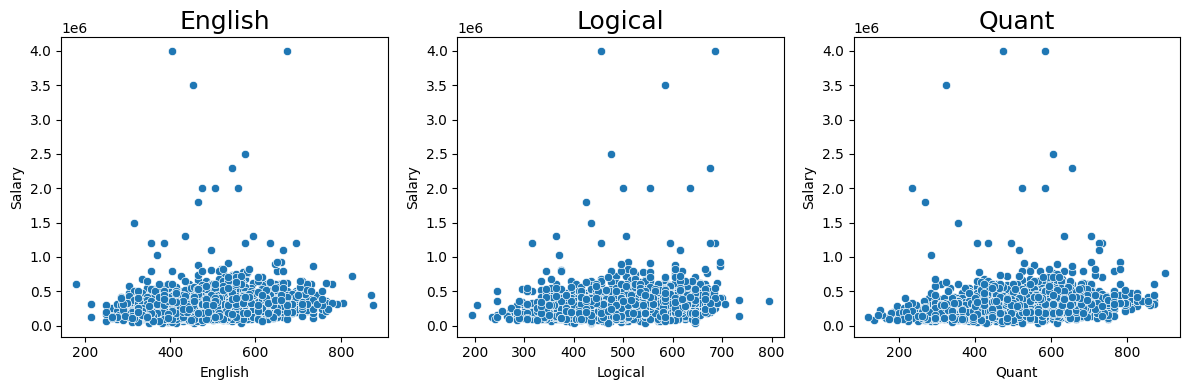

In [ ]:
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=0.3)

for i, s in enumerate(skill):
    plt.subplot2grid((1, 3), (0,i))
    sns.scatterplot(x=train[s], y=train['Salary']).set_title(s, fontsize=18)

plt.tight_layout()
plt.show()

In [ ]:
# Tìm ra đặc trưng tốt nhất
print(f'Best attribute is: {skill.columns[best_index_c]}')
print(f'Cross-validation error: {error_list_c[best_index_c]}')


Best attribute is: Quant
Cross-validation error: 117387.43161323566


In [ ]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
x_c, bias_c = LinearRegression(skill.to_numpy()[:, best_index_c:best_index_c + 1], y_train)

In [ ]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
skill_test = test[['Quant']]
skill_pred = bias_c + x_c * skill_test

In [ ]:
MAE(y_test, skill_pred)

125338.42789216392

In [ ]:
## Tìm công thức
findFormula(x_c, bias_c)

Intercept: 
 117759.72931230717
Coefficients: 
 [368.85246384]


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 117759.729 + 368.852{Quant}$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

Model 1: Sử dụng lại model ở bài 1a, nhưng loại bỏ những đặc tính không liên quan và xuất hiện correlation cao

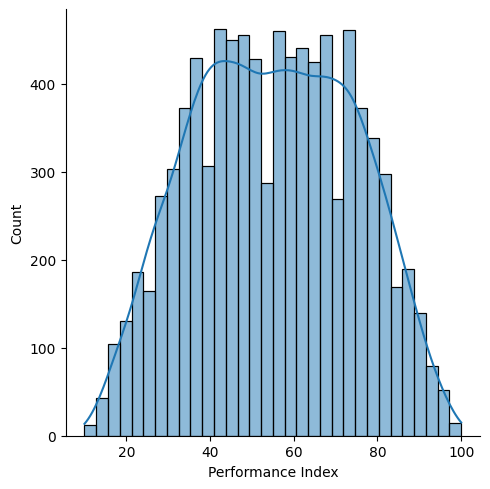

In [17]:
## Rechecking data
plot = sns.displot(train["Performance Index"], kde=True)

In [18]:
replace_outliers_with_iqr(train, "Performance Index")

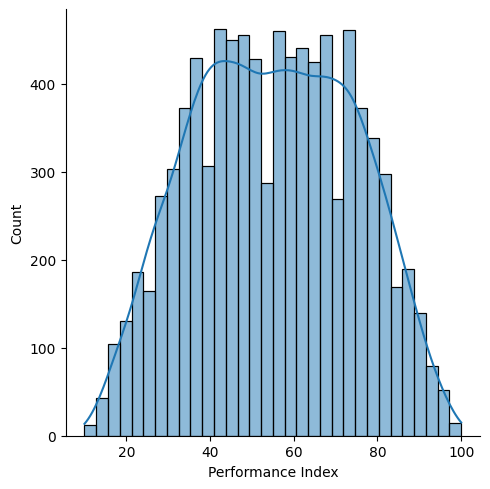

In [19]:
plot = sns.displot(train["Performance Index"], kde=True)

Text(0.5, 1.0, 'Scatter Plot of 10percentage with 12percentage')

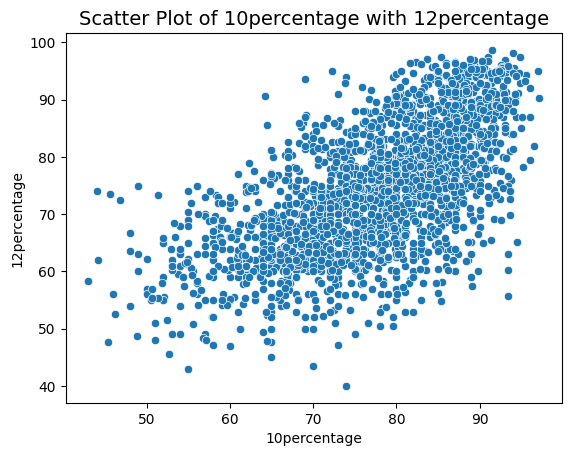

In [ ]:
plot = sns.scatterplot(x = train['10percentage'], y=train['12percentage'])
plot.set_title("Scatter Plot of 10percentage with 12percentage", fontsize=14)

In [ ]:
train["10percentage"].corr(train["12percentage"])

0.6445183732583881

In [ ]:
## Có correlation cao giữa 10percentage và 12percentage, ở đây 12percentage sẽ được sử dụng vì dữ liệu mang tính chất gần kề hơn

Text(0.5, 1.0, 'Scatter Plot of CollegeTier with CollegeCityTier')

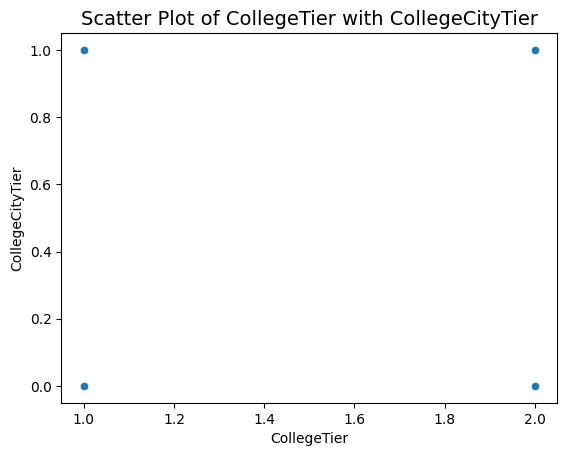

In [ ]:
plot = sns.scatterplot(x=train["CollegeTier"], y=train["CollegeCityTier"])
plot.set_title("Scatter Plot of CollegeTier with CollegeCityTier", fontsize=14)

In [ ]:
np.abs(train["CollegeTier"].corr(train["CollegeCityTier"]))

0.09306672835171165

In [ ]:
## Ở đây mình sẽ loại bỏ CollegeCityTier vì nó không liên quan nhiều đến lương
## Sau khi loại trừ thì chúng ta còn 9 thuộc tính: 
## 'Gender','12percentage', 'Degree', 'collegeGPA','CollegeTier', 'English','Logical', 'Quant','Domain'

In [ ]:
model1 = train[['Gender','12percentage', 'Degree', 'collegeGPA','CollegeTier', 'English','Logical', 'Quant','Domain']]
cv_model1 = CrossValidation(model1.to_numpy()[:,:], y_train,10) 
x_1, bias_1 = LinearRegression(model1.to_numpy()[:,:], y_train)
print(cv_model1)


113729.86760853739


In [ ]:
model1_test = test[['Gender','12percentage', 'Degree', 'collegeGPA','CollegeTier', 'English','Logical', 'Quant','Domain']]
model1_pred = bias_1 + np.sum(x_1 * model1_test, axis = 1)
MAE(y_test, model1_pred)

105236.59162977398

Model 2: Ảnh hưởng của điểm số các môn học kỹ thuật của AMCAT

In [ ]:
subjects = train[['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']]
cv_model2 = CrossValidation(subjects.to_numpy()[:,:], y_train,10) 
x_2, bias_2 = LinearRegression(subjects.to_numpy()[:,:], y_train)
print(cv_model2)

121146.17324643843


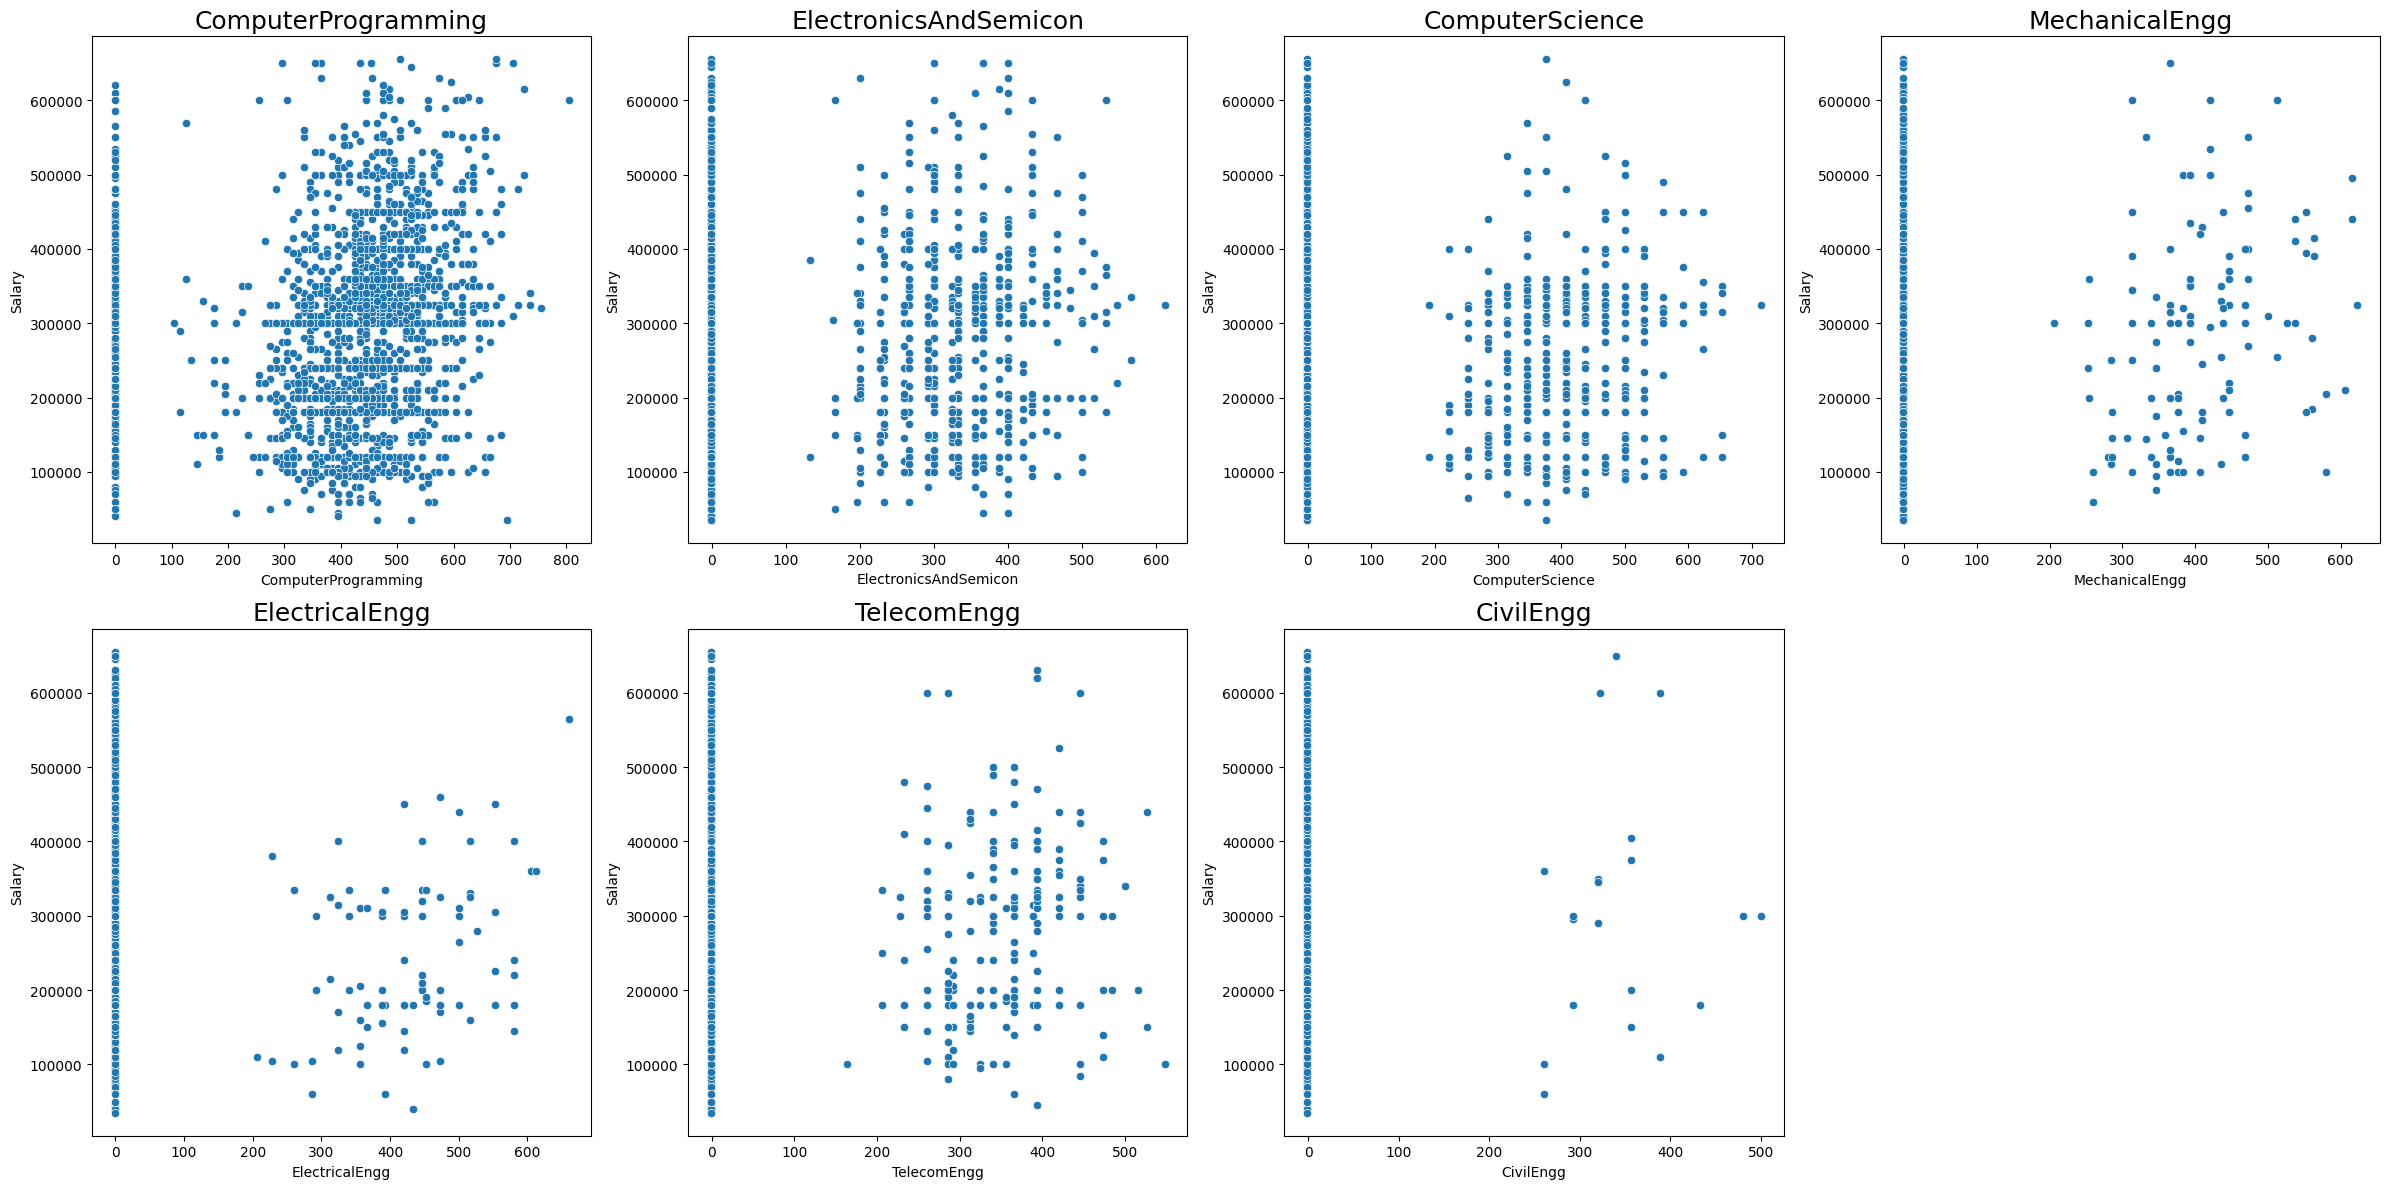

In [ ]:
plt.figure(figsize=(24,12))
plt.subplots_adjust(wspace=0.3)
cols = 4
rows = 2

for i, s in enumerate(subjects):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=train[s], y=train['Salary']).set_title(s, fontsize=18)

plt.tight_layout()
plt.show()

In [ ]:
model2_test = test[['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']]
model2_pred = bias_2 + np.sum(x_2 * model2_test, axis = 1)
MAE(y_test, model2_pred)

114805.54801929033

Model 3: Lấy những thuộc tính có VIF (Variance Inflation Factor) nhỏ hơn 20

In [ ]:
## Calculating VIF (variance inflation factor) to find multicollinearity
vif = pd.DataFrame()
vif["Column"] = train.columns
vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
vif.drop(vif.index[-1], inplace = True)

vif = vif[vif["VIF"] < 20]

vif

,Column,VIF
0,Gender,10.519143
4,Degree,16.842509
6,CollegeCityTier,1.485285
10,Domain,2.896581
11,ComputerProgramming,7.815107
12,ElectronicsAndSemicon,2.139221
13,ComputerScience,1.583824
14,MechanicalEngg,1.402626
15,ElectricalEngg,1.136335
16,TelecomEngg,1.361309


In [ ]:
model3 = train[['Gender','Degree','CollegeCityTier', 'Domain', 'ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']]
cv_model3 = CrossValidation(model3.to_numpy()[:,:], y_train,10) 
x_3, bias_3 = LinearRegression(model3.to_numpy()[:,:], y_train)
print(cv_model3)

118541.02755860848


In [ ]:
model3_test = test[['Gender','Degree','CollegeCityTier', 'Domain', 'ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']]
model3_pred = bias_3 + np.sum(x_3 * model3_test, axis = 1)
MAE(y_test, model3_pred)

111924.33443968225

Model 4 : Chọn top 10 những thuộc tính có cross-validation thấp nhất 

In [ ]:
error_list_train, best_index_train = chooseBestProperty(x_train, y_train)
CVTrain = pd.DataFrame() 
CVTrain["Column"] = train.columns
CVTrain.drop(CVTrain.index[-1], inplace = True)
cv_list_train = dict(zip(train.columns, error_list_train))
result = []
for c in cv_list_train: 
    ##print (f'Cross-validation error for {c}: {cv_list_train[c]}')
    result.append(cv_list_train[c])

CVTrain["Cross-validation error"] = [i for i in result]
CVTrain = CVTrain.sort_values(by = 'Cross-validation error')
CVTrain.head(10)

,Column,Cross-validation error
9,Quant,117260.762455
1,10percentage,118988.508613
8,Logical,119998.421336
2,12percentage,120133.567558
7,English,120744.995439
5,collegeGPA,121540.060098
10,Domain,122123.418172
11,ComputerProgramming,122763.622475
3,CollegeTier,123310.456389
21,nueroticism,123435.415505


In [ ]:
model4 = train[['Quant', '10percentage', 'Logical', '12percentage', 'English', 'collegeGPA', 'Domain', 'ComputerProgramming','CollegeTier','nueroticism']]
cv_model4 = CrossValidation(model4.to_numpy()[:,:], y_train,10) 
x_4, bias_4 = LinearRegression(model4.to_numpy()[:,:], y_train)
print(cv_model4)

113521.68155814658


In [ ]:
model4_test = test[['Quant', '10percentage', 'Logical', '12percentage', 'English', 'collegeGPA', 'Domain', 'ComputerProgramming','CollegeTier','nueroticism']]
model4_pred = bias_4 + np.sum(x_4 * model4_test, axis = 1)
MAE(y_test, model4_pred)

104324.43323106658

## Thử nghiệm, so sánh các mô hình

In [ ]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

cross_val = []
cross_val.append(cv_model1)
cross_val.append(cv_model2)
cross_val.append(cv_model3)
cross_val.append(cv_model4)

cv = pd.DataFrame()
cv["Model name"] = ['Reprocessed first 11 attributes','Scores in AMCAT technical subjects','Attributes having VIF < 20','Top 10 Attributes having smallest CV error']
cv['Cross-validation error'] = [c for c in cross_val]

cv

,Model name,Cross-validation error
0,Reprocessed first 11 attributes,113729.867609
1,Scores in AMCAT technical subjects,121146.173246
2,Attributes having VIF < 20,118541.027559
3,Top 10 Attributes having smallest CV error,113521.681558


In [ ]:
mae_list = []
mae_list.append(MAE(y_test, model1_pred))
mae_list.append(MAE(y_test, model2_pred))
mae_list.append(MAE(y_test, model3_pred))
mae_list.append(MAE(y_test, model4_pred))

models = pd.DataFrame()
models["Model name"] = ['Reprocessed first 11 attributes','Scores in AMCAT technical subjects','Attributes having VIF < 20','Top 10 Attributes having smallest CV error']
models["MAE"] = [m for m in mae_list]

models

,Model name,MAE
0,Reprocessed first 11 attributes,105236.591630
1,Scores in AMCAT technical subjects,114805.548019
2,Attributes having VIF < 20,111924.334440
3,Top 10 Attributes having smallest CV error,104324.433231


In [ ]:
## Conclusion: Best model of the 4 is "Top 10 Attributes having smallest CV error"

In [ ]:
x_4 = np.array2string(x_4, precision=3, separator=',',suppress_small=True)
findFormula(x_4, bias_4)

Intercept: 
 71626.09348183172
Coefficients: 
 [   128.601,   529.78 ,   120.956,  1062.286,   131.316,  1083.743,
  26282.433,    67.969,-99901.372, -4558.527]


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 71626.094 + 128.601{Quant} + 529.780{10percentage} + 120.956{Logical} + 1062.287{12percentage} 
+ 131.316{English}\\ + 1083.743{collegeGPA} - 26282.433{Domain} + 67.969{ComputerProgramming} + -99901.372{CollegeTier} -4588.527{Nueroticism}$$